In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

In [3]:
X = df.drop('target', axis=1)
Y = df.T.tail(1).T

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Spliting in 70-30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)
# Z scoring data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
dtclf = model.fit(X_train, y_train)

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9064327485380117


In [7]:
print("Classification report for classifier %s:\n%s\n"
      % (dtclf, classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        63
         1.0       0.97      0.88      0.92       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.90       171
weighted avg       0.92      0.91      0.91       171




In [8]:
# define function to run cross-validation on trees with different depths

def run_cross_validation_on_trees(X, y, tree_depths, cv=20, scoring='accuracy'):
    # make a list of cross-validation score, standard deviation, mean for different depths
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    # examine each depth with a decision tree classifier and add the results to the lists so we can plot them
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# define function to plot cross-validation results using matplotlib

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-o', label='train accuracy', alpha=0.9)
    ax.set_xlabel('Depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

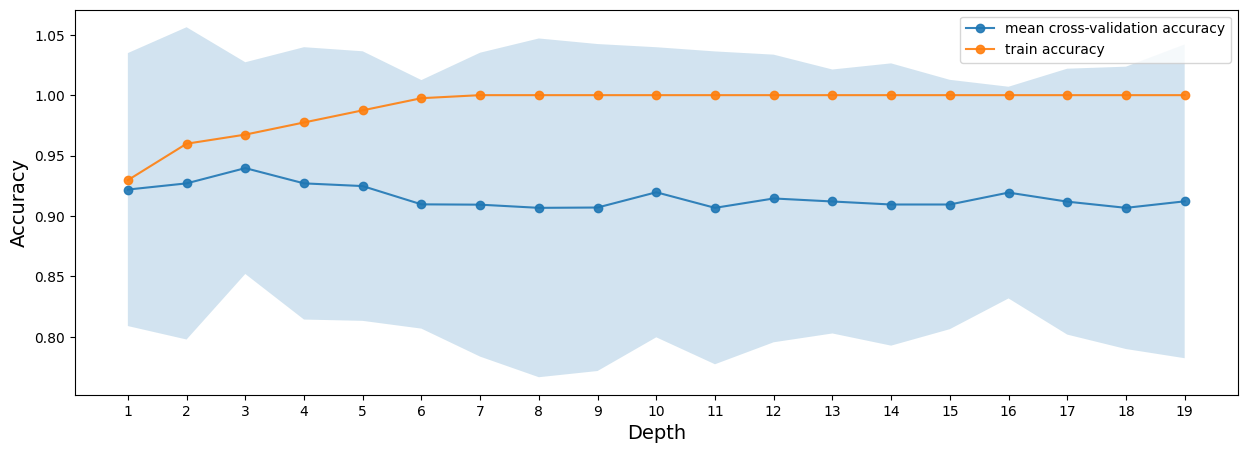

In [9]:
# run the functions in order to display the results

# create a list of depths
tree_depths = range(1,20)

# get scores, standard deviations, accuracy scores for our dataset with all the depths we have
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(X_train, y_train, tree_depths)

# plot the results
plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores)

In [10]:
max_mean = cv_scores_mean.argmax()
best_tree_depth = tree_depths[max_mean]
best_tree_cv_score = cv_scores_mean[max_mean]
best_tree_cv_score_std = cv_scores_std[max_mean]
print('The tree with the depth {} has the best mean cross-validation accuracy which is {} '.format(best_tree_depth, round(best_tree_cv_score*100,5)))

The tree with the depth 3 has the best mean cross-validation accuracy which is 93.96053 
